# Data Cleaning in Pandas

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
df = pd.read_excel('/content/gdrive/My Drive/Courses/Data Analyst Bootcamp/Customer Call List.xlsx')

In [ ]:
df = df.drop_duplicates()

In [ ]:
df = df.drop(columns = 'Not_Useful_Column')

In [ ]:
#df['Last_Name'] = df['Last_Name'].str.strip('...')
#df['Last_Name'] = df['Last_Name'].str.strip('/')
#df['Last_Name'] = df['Last_Name'].str.strip('_')
df['Last_Name'] = df['Last_Name'].str.strip('123._/')

In [ ]:
df['Phone_Number'] = df['Phone_Number'].str.replace('[^a-zA-Z0-9]', '')

<ipython-input-16-e2c6a15e7961>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Phone_Number'] = df['Phone_Number'].str.replace('[^a-zA-Z0-9]', '')


In [ ]:
df['Phone_Number'] = df['Phone_Number'].apply(lambda x: str(x))

In [ ]:
df['Phone_Number'] = df['Phone_Number'].apply(lambda x: x[0:3] + '-' + x[3:6] + '-' + x[6:10])

In [ ]:
df['Phone_Number'] = df['Phone_Number'].str.replace('nan--', '')
df['Phone_Number'] = df['Phone_Number'].str.replace('Na--', '')

In [ ]:
df[['Street_Address', 'State', 'Zip_Code']] = df['Address'].str.split(',', 2, expand = True)

<ipython-input-26-997170ee5790>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Street_Address', 'State', 'Zip_Code']] = df['Address'].str.split(',', 2, expand = True)


In [ ]:
df['Paying Customer'] = df['Paying Customer'].str.replace('Yes', 'Y')
df['Paying Customer'] = df['Paying Customer'].str.replace('No', 'N')

In [ ]:
df['Do_Not_Contact'] = df['Do_Not_Contact'].str.replace('Yes', 'Y')
df['Do_Not_Contact'] = df['Do_Not_Contact'].str.replace('No', 'N')

In [ ]:
df = df.fillna('')

In [ ]:
df = df.replace('N/a', '')
df = df.replace('NaN', '')

In [ ]:
for x in df.index:
  if df.loc[x, 'Do_Not_Contact'] == 'Y':
    df.drop(x, inplace = True)

In [ ]:
for x in df.index:
  if df.loc[x, 'Phone_Number'] == '':
    df.drop(x, inplace = True)

In [ ]:
df = df.reset_index(drop = True)

In [ ]:
df = df.drop(columns = 'Address')

In [ ]:
df

,CustomerID,First_Name,Last_Name,Phone_Number,Paying Customer,Do_Not_Contact,Street_Address,State,Zip_Code
0,1001,Frodo,Baggins,123-545-5421,Y,N,123 Shire Lane,Shire,
1,1005,Jon,Snow,876-678-3469,Y,N,123 Dragons Road,,
2,1008,Sherlock,Holmes,876-678-3469,N,N,98 Clue Drive,,
3,1010,Peter,Parker,123-545-5421,Y,N,25th Main Street,New York,
4,1013,Don,Draper,123-543-2345,Y,N,2039 Main Street,,
5,1014,Leslie,Knope,876-678-3469,Y,N,343 City Parkway,,
6,1015,Toby,Flenderson,304-762-2467,N,N,214 HR Avenue,,
7,1016,Ron,Weasley,123-545-5421,N,N,2395 Hogwarts Avenue,,
8,1017,Michael,Scott,123-643-9775,Y,N,121 Paper Avenue,Pennsylvania,
9,1020,Anakin,Skywalker,876-678-3469,Y,N,910 Tatooine Road,Tatooine,


# Exploratory Data Analysis (EDA) in Pandas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Courses/Data Analyst Bootcamp/world_population.csv')

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

In [ ]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.00,230.00,233.00,230.00,227.00,227.00,229.00,229.00,230.00,232.00,230.00,232.00,234.00
mean,117.50,34632250.88,33600710.95,32066004.16,30270164.48,26840495.26,19330463.93,16282884.78,15866499.13,581663.75,456.81,1.01,0.43
std,67.69,137889172.44,135873196.61,131507146.34,126074183.54,113352454.57,81309624.96,69345465.54,68355859.75,1769133.06,2083.74,0.01,1.71
min,1.00,510.00,520.00,564.00,596.00,651.00,700.00,733.00,752.00,1.00,0.03,0.91,0.00
25%,59.25,419738.50,406471.00,394295.00,382726.50,329470.00,261928.00,223752.00,145880.50,2567.25,36.60,1.00,0.01
50%,117.50,5762857.00,5456681.00,5244415.00,4889741.00,4491202.00,3785847.00,3135123.00,2511718.00,77141.00,95.35,1.01,0.07
75%,175.75,22653719.00,21522626.00,19730853.75,16825852.50,15625467.00,11882762.00,9817257.00,8817329.00,414643.25,236.88,1.02,0.28
max,234.00,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,1153704252.00,982372466.00,822534450.00,17098242.00,23172.27,1.07,17.88


In [ ]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                4
2020 Population                1
2015 Population                4
2010 Population                7
2000 Population                7
1990 Population                5
1980 Population                5
1970 Population                4
Area (km²)                     2
Density (per km²)              4
Growth Rate                    2
World Population Percentage    0
dtype: int64

In [ ]:
df.nunique()

Rank                           234
CCA3                           234
Country                        234
Capital                        234
Continent                        6
2022 Population                230
2020 Population                233
2015 Population                230
2010 Population                227
2000 Population                227
1990 Population                229
1980 Population                229
1970 Population                230
Area (km²)                     231
Density (per km²)              230
Growth Rate                    178
World Population Percentage     70
dtype: int64

In [ ]:
df.sort_values(by = '2022 Population', ascending = False).head(10)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,1153704252.00,982372466.00,822534450.00,9706961.00,146.89,1.00,17.88
92,2,IND,India,New Delhi,Asia,1417173173.00,1396387127.00,1322866505.00,1240613620.00,1059633675.00,NaN,NaN,557501301.00,3287590.00,431.07,1.01,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857.00,335942003.00,324607776.00,311182845.00,282398554.00,248083732.00,223140018.00,200328340.00,9372610.00,36.09,1.00,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339.00,271857970.00,259091970.00,244016173.00,214072421.00,182159874.00,148177096.00,115228394.00,1904569.00,144.65,1.01,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862.00,227196741.00,210969298.00,194454498.00,154369924.00,115414069.00,80624057.00,59290872.00,881912.00,267.40,1.02,2.96
149,6,NGA,Nigeria,Abuja,Africa,218541212.00,208327405.00,183995785.00,160952853.00,122851984.00,95214257.00,72951439.00,55569264.00,923768.00,236.58,1.02,2.74
27,7,BRA,Brazil,Brasilia,South America,215313498.00,213196304.00,205188205.00,196353492.00,175873720.00,150706446.00,122288383.00,96369875.00,8515767.00,25.28,1.00,2.70
16,8,BGD,Bangladesh,Dhaka,Asia,171186372.00,167420951.00,157830000.00,148391139.00,129193327.00,107147651.00,83929765.00,67541860.00,147570.00,1160.04,1.01,2.15
171,9,RUS,Russia,Moscow,Europe,144713314.00,145617329.00,144668389.00,143242599.00,146844839.00,148005704.00,138257420.00,130093010.00,17098242.00,8.46,1.00,1.81
131,10,MEX,Mexico,Mexico City,North America,127504125.00,125998302.00,120149897.00,112532401.00,97873442.00,81720428.00,67705186.00,50289306.00,1964375.00,64.91,1.01,1.60


In [ ]:
df.corr()

<ipython-input-67-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.00,-0.36,-0.36,-0.35,-0.35,-0.34,-0.33,-0.33,-0.34,-0.38,0.13,-0.22,-0.36
2022 Population,-0.36,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.97,0.45,-0.03,-0.02,1.00
2020 Population,-0.36,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.98,0.45,-0.03,-0.03,1.00
2015 Population,-0.35,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.98,0.46,-0.03,-0.03,1.00
2010 Population,-0.35,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.98,0.46,-0.03,-0.04,1.00
2000 Population,-0.34,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.47,-0.03,-0.05,0.99
1990 Population,-0.33,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,0.52,-0.03,-0.07,0.99
1980 Population,-0.33,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,0.53,-0.03,-0.08,0.99
1970 Population,-0.34,0.97,0.98,0.98,0.98,0.99,1.00,1.00,1.00,0.51,-0.03,-0.08,0.97
Area (km²),-0.38,0.45,0.45,0.46,0.46,0.47,0.52,0.53,0.51,1.00,-0.06,-0.01,0.45


<ipython-input-73-dbd23a571468>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


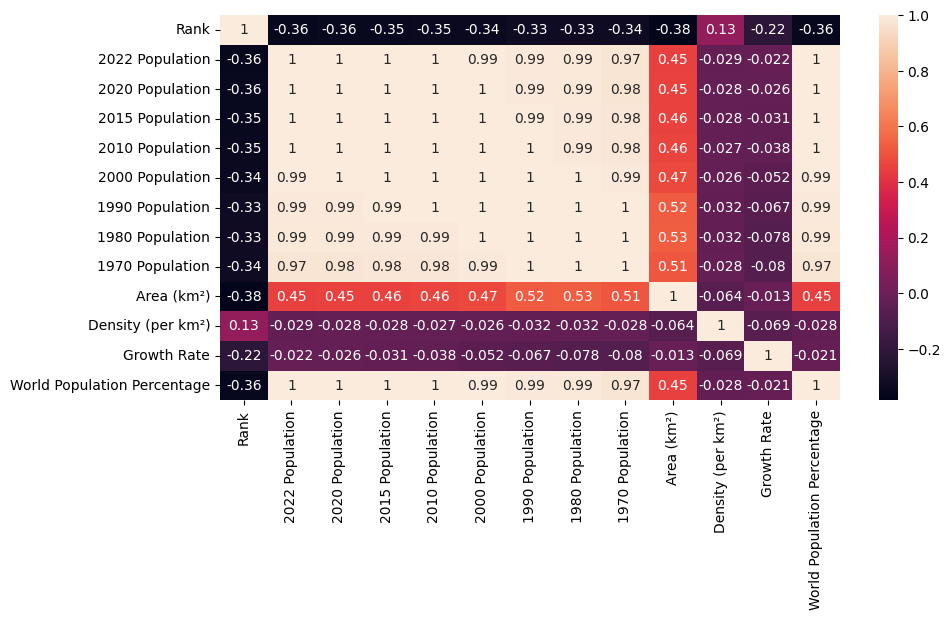

In [ ]:
sns.heatmap(df.corr(), annot = True)
plt.rcParams['figure.figsize'] = (15, 7)
plt.show()

In [ ]:
df.groupby('Continent').mean().sort_values(by = '2022 Population', ascending = False)

<ipython-input-78-c63c1e9fb722>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Continent').mean().sort_values(by = '2022 Population', ascending = False)


,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,
Asia,77.56,96327387.31,94955134.37,89165003.64,89087770.00,80580835.11,48639995.33,40278333.33,43839877.83,642762.82,1025.02,1.01,1.18
South America,97.57,31201186.29,30823574.50,29509599.71,26789395.54,25015888.69,21224743.93,17270643.29,13781939.71,1301302.85,20.97,1.01,0.39
Africa,92.16,25455879.68,23871435.26,21419703.57,18898197.31,14598365.95,11376964.52,8586031.98,6567175.27,537879.30,126.41,1.02,0.31
Europe,124.50,15055371.82,14915843.92,15027454.12,14712278.68,14817685.71,14785203.94,14200004.52,13118479.82,460208.22,663.32,1.00,0.19
North America,160.93,15007403.40,14855914.82,14259596.25,13568016.28,12151739.60,10531660.62,9207334.03,7885865.15,606104.45,272.49,1.00,0.19
Oceania,188.52,2046386.32,1910148.96,1756664.48,1613163.65,1357512.09,1162774.87,996532.17,846968.26,370220.91,132.54,1.01,0.02


In [ ]:
df.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [ ]:
#df2 = df.groupby('Continent')[df.columns[5:13]].mean()
df2 = df.groupby('Continent')[['1970 Population',
       '1980 Population', '1990 Population', '2000 Population',
       '2010 Population', '2015 Population', '2020 Population',
       '2022 Population']].mean()

In [ ]:
df2 = df2.transpose()

<Axes: >

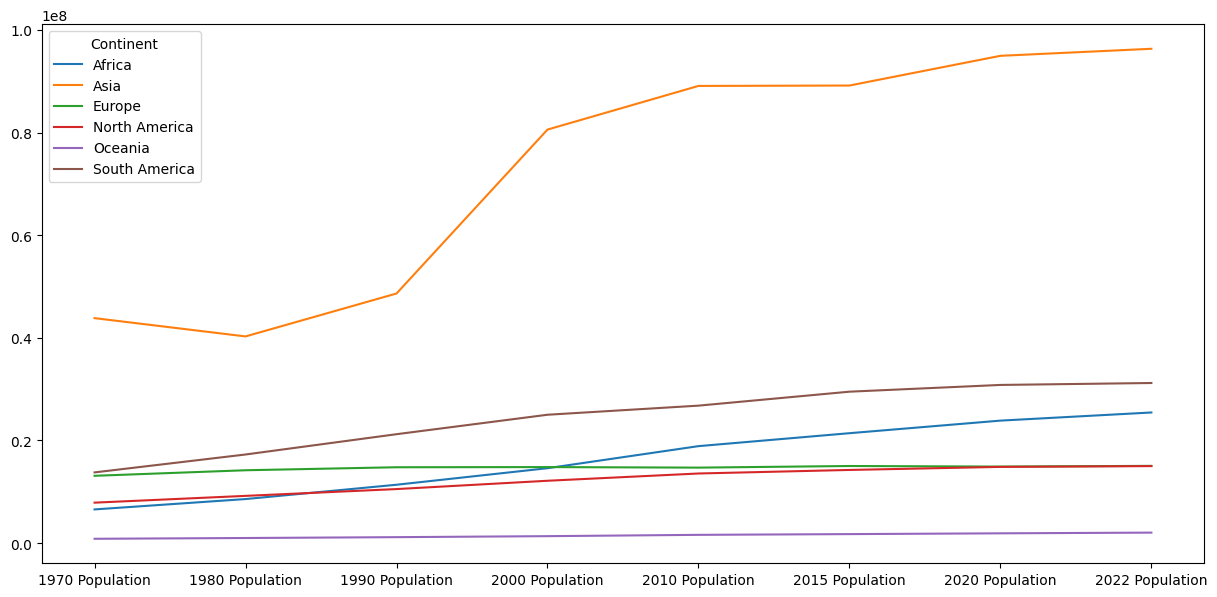

In [ ]:
df2.plot()

In [ ]:
df[df['Continent'].str.contains('Asia')].sort_values(by = '2022 Population', ascending = False)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,1153704252.00,982372466.00,822534450.00,9706961.00,146.89,1.00,17.88
92,2,IND,India,New Delhi,Asia,1417173173.00,1396387127.00,1322866505.00,1240613620.00,1059633675.00,NaN,NaN,557501301.00,3287590.00,431.07,1.01,17.77
93,4,IDN,Indonesia,Jakarta,Asia,275501339.00,271857970.00,259091970.00,244016173.00,214072421.00,182159874.00,148177096.00,115228394.00,1904569.00,144.65,1.01,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862.00,227196741.00,210969298.00,194454498.00,154369924.00,115414069.00,80624057.00,59290872.00,881912.00,267.40,1.02,2.96
16,8,BGD,Bangladesh,Dhaka,Asia,171186372.00,167420951.00,157830000.00,148391139.00,129193327.00,107147651.00,83929765.00,67541860.00,147570.00,1160.04,1.01,2.15
102,11,JPN,Japan,Tokyo,Asia,123951692.00,125244761.00,127250933.00,128105431.00,126803861.00,123686321.00,117624196.00,105416839.00,377930.00,327.98,0.99,1.55
163,13,PHL,Philippines,Manila,Asia,115559009.00,112190977.00,103031365.00,94636700.00,77958223.00,61558898.00,48419546.00,37435586.00,342353.00,337.54,1.01,1.45
228,16,VNM,Vietnam,Hanoi,Asia,98186856.00,96648685.00,92191398.00,87411012.00,79001142.00,66912613.00,52968270.00,41928849.00,331212.00,296.45,1.01,1.23
94,17,IRN,Iran,Tehran,Asia,88550570.00,87290193.00,81790841.00,75373855.00,65544383.00,55793629.00,38520664.00,28449705.00,1648195.00,53.73,1.01,1.11
213,18,TUR,Turkey,Ankara,Asia,85341241.00,84135428.00,79646178.00,73195345.00,64113547.00,54324142.00,44089069.00,35540990.00,783562.00,108.91,1.01,1.07


<Axes: >

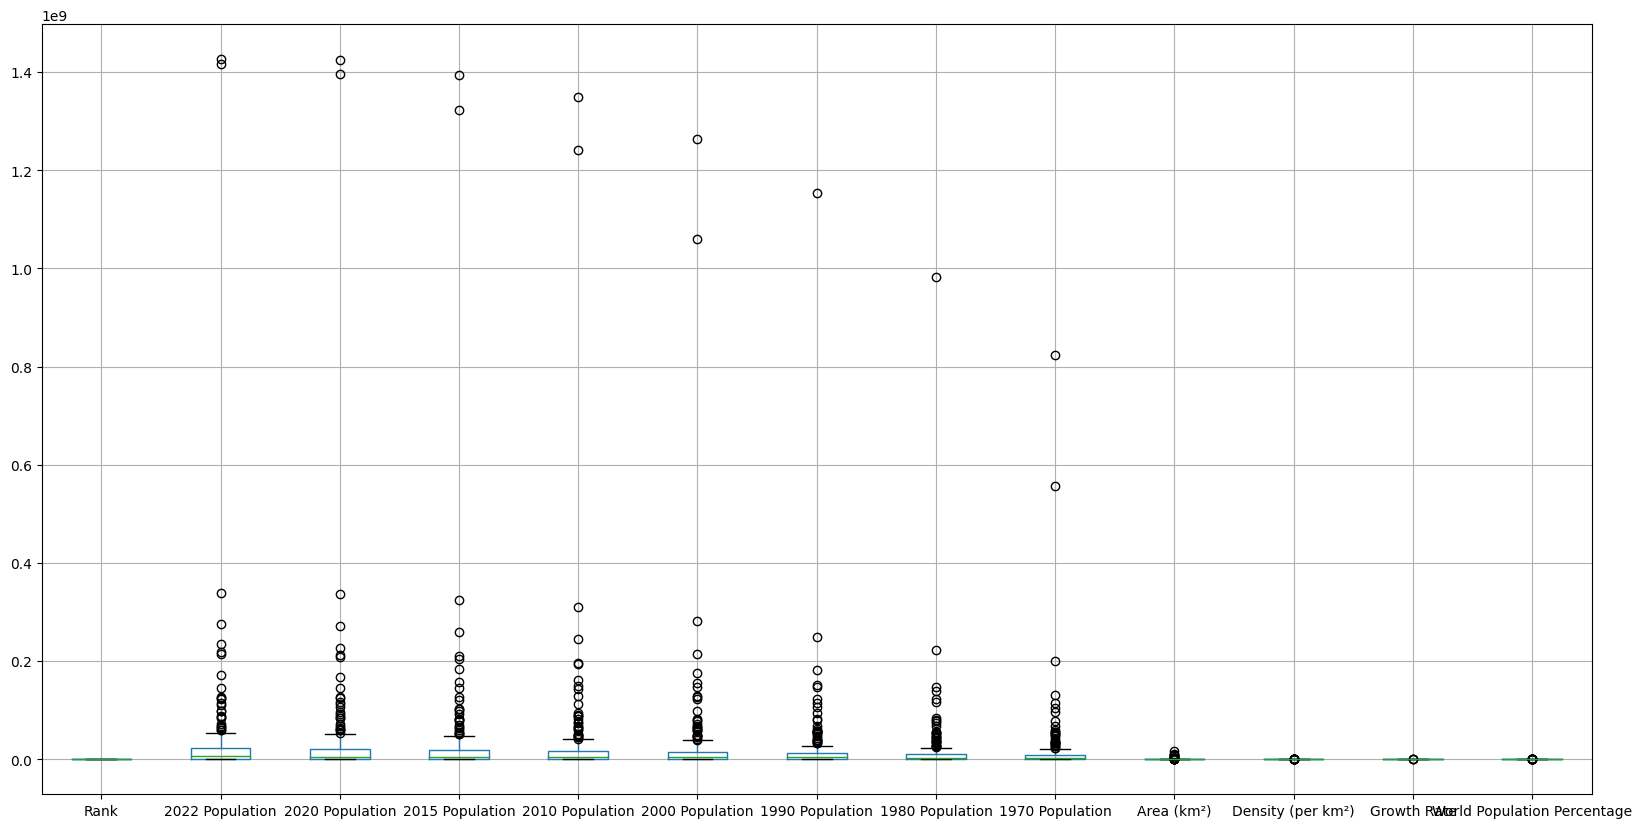

In [ ]:
df.boxplot(figsize = (20,10))

In [ ]:
#df.select_dtypes(include = 'number')
df.select_dtypes(include = 'object')

,CCA3,Country,Capital,Continent
0,AFG,Afghanistan,Kabul,Asia
1,ALB,Albania,Tirana,Europe
2,DZA,Algeria,Algiers,Africa
3,ASM,American Samoa,Pago Pago,Oceania
4,AND,Andorra,Andorra la Vella,Europe
...,...,...,...,...
229,WLF,Wallis and Futuna,Mata-Utu,Oceania
230,ESH,Western Sahara,El Aaiún,Africa
231,YEM,Yemen,Sanaa,Asia
232,ZMB,Zambia,Lusaka,Africa
